In [1]:
import pandas as pd
file_path = 'olist_customers_dataset.csv'
df = pd.read_csv(file_path)
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

Shape of dataset: (99441, 5)

Columns: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

First few rows:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             S

In [3]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Get summary statistics
print(df.describe(include='all'))


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Duplicate rows: 0
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  Na

In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Updated columns:", df.columns.tolist())

Updated columns: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


In [7]:
# Unique customer states
print("Unique states:", df['customer_state'].unique())

# Check zip code prefix range
print("Zip code prefix range:", df['customer_zip_code_prefix'].min(), "-", df['customer_zip_code_prefix'].max())


Unique states: ['SP' 'SC' 'MG' 'PR' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF'
 'RN' 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR']
Zip code prefix range: 1003 - 99990


In [9]:
# Check for blank strings in city
print("Blank cities:", (df['customer_city'].str.strip() == '').sum())

# Check for blank customer IDs
print("Blank customer IDs:", (df['customer_id'].str.strip() == '').sum())


Blank cities: 0
Blank customer IDs: 0


**TASK 1: Derive a New Field (Basic Transformation)**
- Let’s add a customer_region column by grouping states into regions.

Here’s a mapping:

North: AC, AP, AM, PA, RO, RR, TO

Northeast: AL, BA, CE, MA, PB, PE, PI, RN, SE

Central-West: DF, GO, MT, MS

Southeast: ES, MG, RJ, SP

South: PR, RS, SC


In [15]:
region_map = {
    'AC': 'North', 'AP': 'North', 'AM': 'North', 'PA': 'North', 'RO': 'North', 'RR': 'North', 'TO': 'North',
    'AL': 'Northeast', 'BA': 'Northeast', 'CE': 'Northeast', 'MA': 'Northeast', 'PB': 'Northeast', 'PE': 'Northeast',
    'PI': 'Northeast', 'RN': 'Northeast', 'SE': 'Northeast',
    'DF': 'Central-West', 'GO': 'Central-West', 'MT': 'Central-West', 'MS': 'Central-West',
    'ES': 'Southeast', 'MG': 'Southeast', 'RJ': 'Southeast', 'SP': 'Southeast',
    'PR': 'South', 'RS': 'South', 'SC': 'South'
}
df['customer_region'] = df['customer_state'].map(region_map)
print(df[['customer_state', 'customer_region']].head())


  customer_state customer_region
0             SP       Southeast
1             SP       Southeast
2             SP       Southeast
3             SP       Southeast
4             SP       Southeast


In [17]:
# Save to cleaned CSV
df.to_csv('cleaned_customers.csv', index=False)

print("Cleaned file saved as 'cleaned_customers.csv'")


Cleaned file saved as 'cleaned_customers.csv'


In [19]:
import sqlite3

# Connecting to a local SQLite database file
conn = sqlite3.connect('ecommerce.db')

# Load the cleaned DataFrame into a SQL table called 'customers'
df.to_sql('customers', conn, if_exists='replace', index=False)

print("✅ Data loaded into 'customers' table in ecommerce.db")

# Check by querying a few rows
sample = pd.read_sql_query("SELECT * FROM customers LIMIT 5;", conn)
print(sample)


✅ Data loaded into 'customers' table in ecommerce.db
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

  customer_region  
0       Southeast  
1       Southeast  
2       Southeast  
3       South

####  STEP 1 → Query: Count of Customers Per Region

In [22]:
query1 = """
SELECT customer_region, COUNT(*) AS customer_count
FROM customers
GROUP BY customer_region
ORDER BY customer_count DESC;
"""

result1 = pd.read_sql_query(query1, conn)
print(result1)

  customer_region  customer_count
0       Southeast           68266
1           South           14148
2       Northeast            9394
3    Central-West            5782
4           North            1851


#### STEP 2 → Query: Top 10 Cities by Customer Count

In [25]:
query2 = """
SELECT customer_city, COUNT(*) AS city_count
FROM customers
GROUP BY customer_city
ORDER BY city_count DESC
LIMIT 10;
"""
result2 = pd.read_sql_query(query2, conn)
print(result2)

           customer_city  city_count
0              sao paulo       15540
1         rio de janeiro        6882
2         belo horizonte        2773
3               brasilia        2131
4               curitiba        1521
5               campinas        1444
6           porto alegre        1379
7               salvador        1245
8              guarulhos        1189
9  sao bernardo do campo         938


####  STEP 3 — Unique Customers Per State

In [28]:
query3 = """
SELECT customer_state, COUNT(DISTINCT customer_unique_id) AS unique_customers
FROM customers
GROUP BY customer_state
ORDER BY unique_customers DESC;
"""

result3 = pd.read_sql_query(query3, conn)
print(result3)


   customer_state  unique_customers
0              SP             40302
1              RJ             12384
2              MG             11259
3              RS              5277
4              PR              4882
5              SC              3534
6              BA              3277
7              DF              2075
8              ES              1964
9              GO              1952
10             PE              1609
11             CE              1313
12             PA               949
13             MT               876
14             MA               726
15             MS               694
16             PB               519
17             PI               482
18             RN               474
19             AL               401
20             SE               342
21             TO               273
22             RO               240
23             AM               143
24             AC                77
25             AP                67
26             RR           

#### BAR CHART (Customers Per Region)

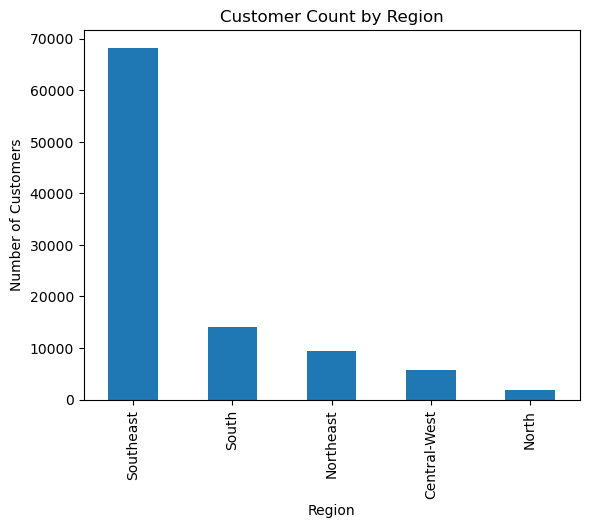

In [32]:
import matplotlib.pyplot as plt

# Bar chart - customer count by region
result1.plot(kind='bar', x='customer_region', y='customer_count', legend=False)
plt.title('Customer Count by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


#### BAR CHART (Top 10 Cities)

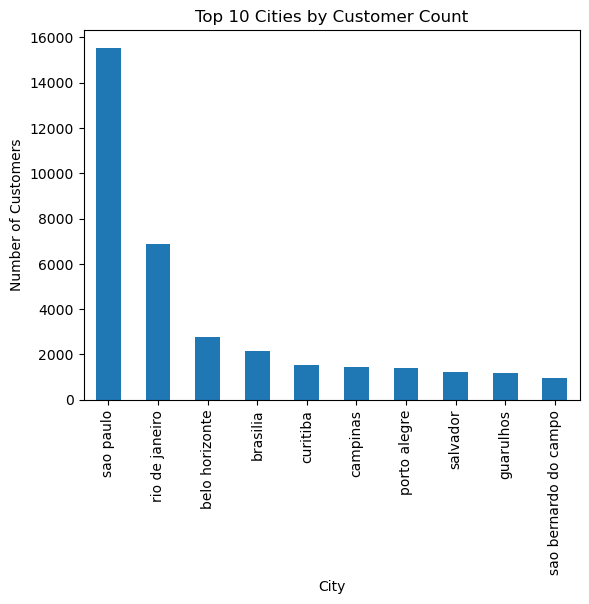

In [35]:
# Bar chart - top 10 cities by customer count
result2.plot(kind='bar', x='customer_city', y='city_count', legend=False)
plt.title('Top 10 Cities by Customer Count')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.show()


#### Customer Share by Region

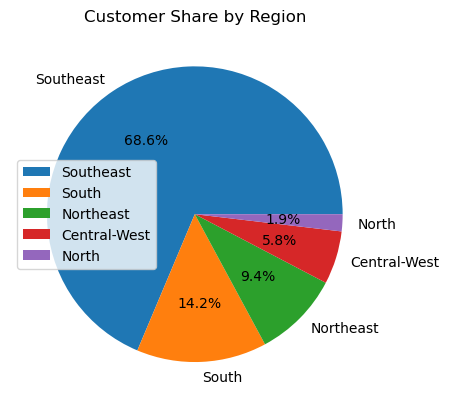

In [38]:
# Pie chart - customer share by region
result1.set_index('customer_region').plot(kind='pie', y='customer_count', autopct='%1.1f%%')
plt.title('Customer Share by Region')
plt.ylabel('')  # Hide y-label
plt.show()
